SENSITIVITY ANALYSIS


=== Sensitivity Analysis Results Including 'k' (30% Perturbation) ===
Parameter       Sensitivity
u                    0.0316
Ks                  -0.0200
Ki                   0.0097
Pso4_max             0.6115
k                   -0.1614
ms                  -0.0020
k_so                 0.0000


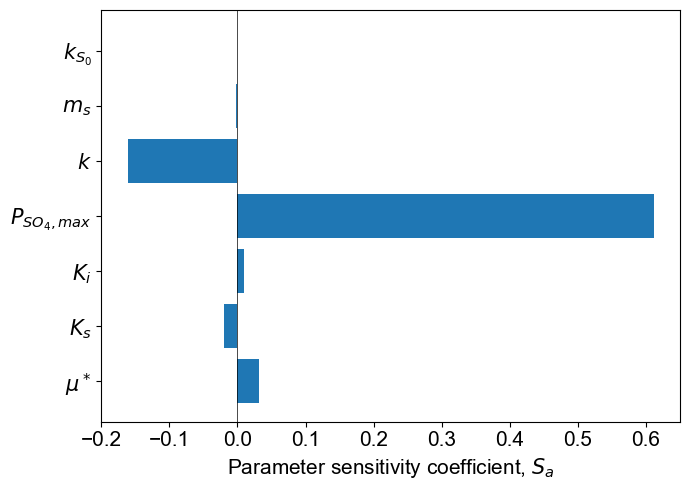

In [1]:
# ========================== SENSITIVITY ANALYSIS (JOINT DATASETS) ==========================

# -------- Import Libraries --------
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# ===================== LOAD AND ORGANIZE DATASETS =====================
# -------- Triplicate Experimental Data --------
t_data = np.array([0.00, 20.58, 45.02, 68.72, 95.80])  # Incubation time same for all

datasets_trip = {
    "50 mM": {
        "X": np.array([
            [0.0223, 0.2083, 0.4372, 0.5738, 0.5847],
            [0.0212, 0.2114, 0.4208, 0.5495, 0.5724],
            [0.0210, 0.2127, 0.3984, 0.5818, 0.5699]
        ]),
        "S": np.array([
            [0.0493, 0.0107, 0.0018, 0.0016, 0.0016],
            [0.0471, 0.0111, 0.0020, 0.0017, 0.0016],
            [0.0471, 0.0106, 0.0019, 0.0015, 0.0016]
        ]),
        "P": np.array([
            [0.0001, 0.0484, 0.0548, 0.0638, 0.0577],
            [0.0001, 0.0468, 0.0534, 0.0627, 0.0598],
            [0.0001, 0.0491, 0.0549, 0.0619, 0.0583]
        ]),
        "PS": np.array([
            [0.0000, 0.0251, 0.0365, 0.0305, 0.0331],
            [0.0000, 0.0267, 0.0387, 0.0286, 0.0344],
            [0.0000, 0.0260, 0.0372, 0.0300, 0.0342]
        ])
    },
    "100 mM": {
        "X": np.array([
            [0.0142, 0.5177, 1.0781, 1.1037, 1.1271],
            [0.0137, 0.4983, 1.0804, 1.0619, 1.0996],
            [0.0137, 0.5038, 1.0389, 1.1028, 1.0961]
        ]),
        "S": np.array([
            [0.0990, 0.0523, 0.0292, 0.0182, 0.0167],
            [0.0942, 0.0530, 0.0298, 0.0184, 0.0161],
            [0.0937, 0.0510, 0.0301, 0.0183, 0.0166]
        ]),
        "P": np.array([
            [0.0001, 0.0500, 0.0892, 0.0861, 0.1025],
            [0.0001, 0.0512, 0.0853, 0.0865, 0.1073],
            [0.0001, 0.0494, 0.0865, 0.0896, 0.1040]
        ]),
        "PS": np.array([
            [0.0000, 0.0361, 0.0602, 0.0644, 0.0740],
            [0.0000, 0.0374, 0.0632, 0.0617, 0.0703],
            [0.0000, 0.0366, 0.0627, 0.0632, 0.0729]
        ])
    },
    "250 mM": {
        "X": np.array([
            [0.0162, 0.4788, 1.1108, 1.1631, 1.1773],
            [0.0170, 0.4631, 1.0578, 1.1976, 1.1370],
            [0.0176, 0.4825, 1.0803, 1.1676, 1.1306]
        ]),
        "S": np.array([
            [0.2418, 0.1911, 0.1472, 0.1376, 0.1247],
            [0.2293, 0.1867, 0.1561, 0.1328, 0.1275],
            [0.2341, 0.1876, 0.1524, 0.1400, 0.1283]
        ]),
        "P": np.array([
            [0.0001, 0.0450, 0.0805, 0.1017, 0.1170],
            [0.0001, 0.0472, 0.0790, 0.0981, 0.1116],
            [0.0001, 0.0458, 0.0772, 0.0951, 0.1151]
        ]),
        "PS": np.array([
            [0.0000, 0.0452, 0.0960, 0.0755, 0.0981],
            [0.0000, 0.0516, 0.0853, 0.0805, 0.0861],
            [0.0000, 0.0448, 0.0837, 0.0789, 0.0921]
        ])
    },
    "500 mM": {
        "X": np.array([
            [0.0510, 0.6100, 1.4000, 1.2326, 1.3000],
            [0.0535, 0.6005, 1.3200, 1.1800, 1.2200],
            [0.0524, 0.5700, 1.3567, 1.2600, 1.2894]
        ]),
        "S": np.array([
            [0.4306, 0.4072, 0.3308, 0.3243, 0.3123],
            [0.4145, 0.3946, 0.3463, 0.3251, 0.3346],
            [0.4065, 0.4004, 0.3255, 0.3232, 0.3258]
        ]),
        "P": np.array([
            [0.0001, 0.0646, 0.0812, 0.0971, 0.1163],
            [0.0001, 0.0617, 0.0765, 0.1043, 0.1091],
            [0.0001, 0.0620, 0.0772, 0.0995, 0.1130]
        ]),
        "PS": np.array([
            [0.0000, 0.0282, 0.0484, 0.0663, 0.0608],
            [0.0000, 0.0327, 0.0538, 0.0653, 0.0649],
            [0.0000, 0.0288, 0.0474, 0.0655, 0.0636]
        ])
    }
}


# ===================== UTILITY FUNCTIONS =====================
# --- Mean across replicates (no CI needed here) ---
def mean_ci(data):
    return np.mean(data, axis=0), None


# ===================== CALIBRATED KINETIC PARAMETERS =====================
params = {
    "u": 0.4956,           # Maximum specific growth rate
    "Ks": 0.08788,         # Substrate half-saturation constant
    "Ki": 0.2196,          # Substrate inhibition constant
    "Pso4_max": 0.1258,    # Maximum sulfate allowed before inhibition
    "k": 1.6,              # Product inhibition factor
    "ms": 1e-05,           # Maintenance coefficient
    "k_so": 1e-05          # Sulfur oxidation rate coefficient
}
Yxs = 11.6
Yps = 1.16
Yp2s = 0.7
Ks_switch = 0.010
Yso4_s0 = 0.00000

# ===================== MODEL DEFINITION =====================
def model(y, t, u, Ks, Ki, Pso4_max, k, ms, k_so):
    X, S, P, Ps = y
    mu = ((u * S) / (Ks + S + ((S**2) / Ki))) * (max(1e-6, 1 - P / Pso4_max) ** k)  #Eq. 10
    dXdt = mu * X                                                                   #Eq. 6
    r_so = k_so * Ps * X if S < Ks_switch else 0                                    #Eq. 17
    dSdt = (dXdt * (-1 / Yxs)) - ms * X                                             #Eq. 14
    dPdt = dXdt * (Yps / Yxs) + Yso4_s0 * r_so                                      #Eq. 15
    dP2dt = dXdt * (Yp2s / Yxs) - r_so                                              #Eq. 16
    return [dXdt, dSdt, dPdt, dP2dt]

# --- Simulate Final Biomass for Given Parameters ---
def simulate_final_X(**kwargs):
    X_finals = []
    for data in datasets_trip.values():
        X_mean, _ = mean_ci(data["X"])
        S_mean, _ = mean_ci(data["S"])
        P_mean, _ = mean_ci(data["P"])
        PS_mean, _ = mean_ci(data["PS"])
        y0 = [X_mean[0], S_mean[0], P_mean[0], PS_mean[0]]
        sol = odeint(model, y0, t_data, args=(
            kwargs["u"], kwargs["Ks"], kwargs["Ki"],
            kwargs["Pso4_max"], kwargs["k"], kwargs["ms"], kwargs["k_so"]
        ))
        X_finals.append(sol[-1, 0])
    return np.mean(X_finals)

# ===================== SENSITIVITY ANALYSIS =====================
X_base = simulate_final_X(**params)
sensitivity_results = {}

for key in params:
    perturbed = params.copy()
    perturbed[key] *= 1.3  # +30% perturbation
    X_perturbed = simulate_final_X(**perturbed)
    sensitivity = ((X_perturbed - X_base) / X_base) / 0.3    # Eq. 21
    sensitivity_results[key] = sensitivity

# ===================== PARAMETER LABELS FOR PLOTTING =====================
param_labels = {
    "Pso4_max": r"$P_{SO_4,max}$",
    "k_so":     r"$k_{S_0}$",
    "ms":       r"$m_s$",
    "Ki":       r"$K_i$",
    "Ks":       r"$K_s$",
    "u":        r"$\mu^*$",
    "k":        r"$k$"
}

# ===================== PRINT AND PLOT RESULTS =====================
print("\n=== Sensitivity Analysis Results Including 'k' (30% Perturbation) ===")
print(f"{'Parameter':<12}{'Sensitivity':>15}")
for name, val in sensitivity_results.items():
    print(f"{name:<12}{val:>15.4f}")

plt.rcParams['font.family'] = 'Arial'

keys = list(sensitivity_results.keys())
values = list(sensitivity_results.values())
labels = [param_labels.get(k, k) for k in keys]

plt.figure(figsize=(7, 5))
plt.barh(labels, values)
plt.axvline(0, linewidth=0.5, color='black')
plt.xlabel("Parameter sensitivity coefficient, $S_a$", fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.tight_layout()
plt.show()
